In [1]:
from google.colab import files
  
  
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data.csv


In [2]:
import pandas as pd

In [14]:
import numpy as np

In [3]:
dataset = pd.read_csv('kc_house_data.csv')

In [4]:
dataset.head()
#gives the headers of the data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
dataset.shape

(21613, 21)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [11]:
dataset.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

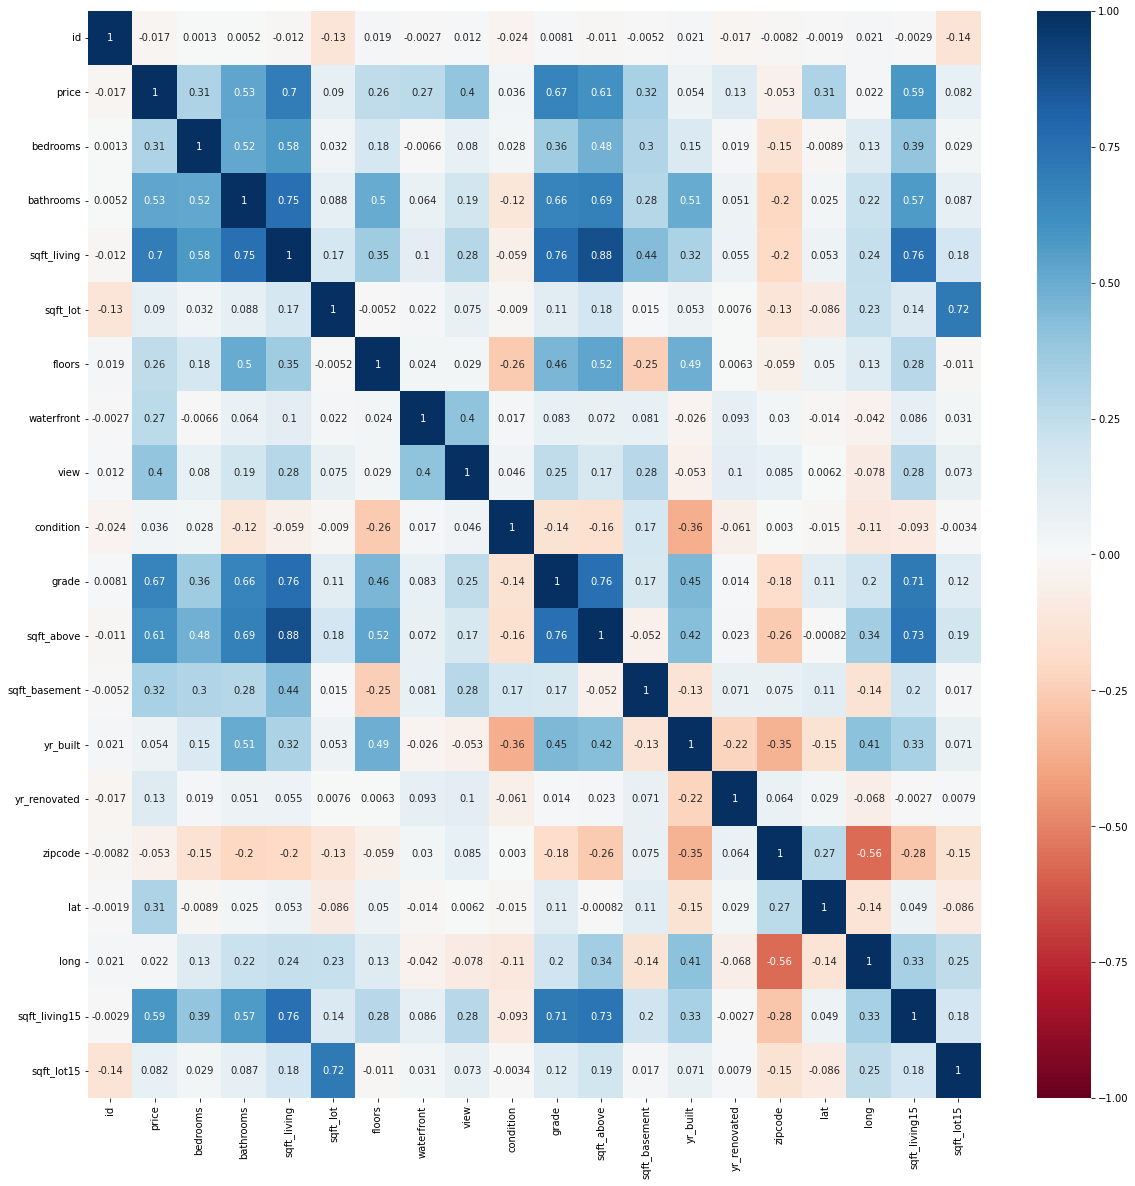

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt



plt.figure(figsize=(20,20))
sns.heatmap(dataset.corr(method ='pearson') , vmin = -1 , cmap = 'RdBu' , annot = True)

The highest co-relation with price is with grade, sqft living15, bedrooms and bathrooms.

In [19]:
def resizeplot(l,a):
    plt.figure(figsize=(l,a))

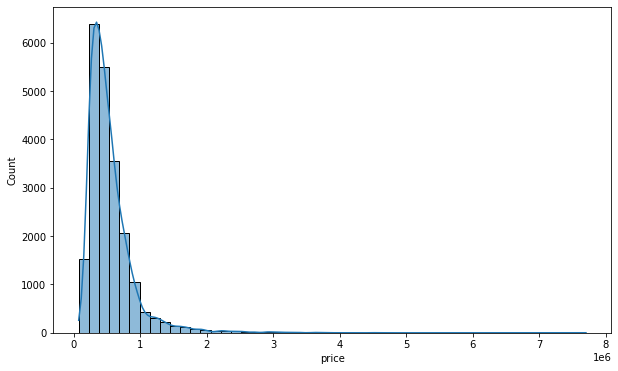

In [20]:
resizeplot(10,6)
sns.histplot(dataset['price'],kde=True,bins=50)

most of the data(house) lies in the price range upto 2 million and beyond are few .

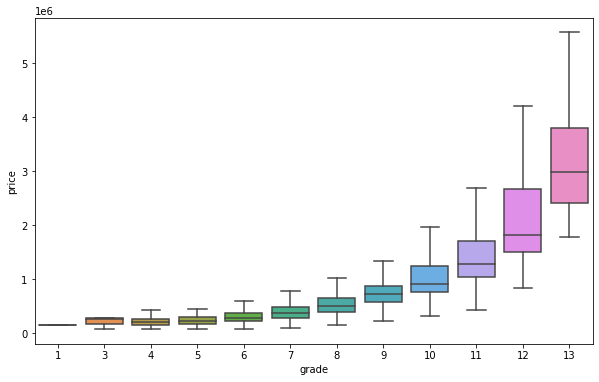

In [22]:
resizeplot(10,6)
sns.boxplot(x='grade',y='price',data=dataset,showfliers=False)

In [24]:
dataset.grade.unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1])

In [35]:
dataset.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

creating a new dataset by droping columns with low correlation

In [36]:
dataset1 = dataset.drop(['id','date','floors','waterfront','view','condition','yr_built','yr_renovated','zipcode','lat','long'], axis = 'columns')

In [37]:
dataset1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,7,1180,0,1340,5650
1,538000.0,3,2.25,2570,7242,7,2170,400,1690,7639
2,180000.0,2,1.00,770,10000,6,770,0,2720,8062
3,604000.0,4,3.00,1960,5000,7,1050,910,1360,5000
4,510000.0,3,2.00,1680,8080,8,1680,0,1800,7503


In [38]:
x = dataset1.drop('price' , axis = 1)

y = dataset1[['price']]

from sklearn.model_selection import train_test_split

X_train, X_validation, Y_train, Y_validation = train_test_split(x , y , test_size = 0.2 , random_state = 7)

In [39]:
num_folds = 10
seed =7

scoring = 'mean_squared_error'

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor


results = []

names = []

models = []

models.append(('LR' , LinearRegression()))
models.append(('KNN' , KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))

In [41]:
models

[('LR', LinearRegression()),
 ('KNN', KNeighborsRegressor()),
 ('CART', DecisionTreeRegressor())]

In [42]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [43]:
for name, model in models:
  kfold = KFold(n_splits = 10 , random_state = 7, shuffle= True)
  cv_results = cross_val_score(model, X_train, Y_train , cv = kfold)
  results.append(cv_results)
  names.append(name)
  msg = "%s : %f (%f)" % ( name , cv_results.mean() , cv_results.std())
  print(msg)

LR : 0.550933 (0.027259)
KNN : 0.497908 (0.039265)
CART : 0.343749 (0.090666)


In [44]:
results

[array([0.61917584, 0.55745738, 0.52887597, 0.56207481, 0.52961262,
        0.55624494, 0.53554731, 0.51933258, 0.53632939, 0.5646825 ]),
 array([0.55756045, 0.50267594, 0.45320053, 0.54006076, 0.48583089,
        0.55735147, 0.49402421, 0.45540595, 0.48357989, 0.44938651]),
 array([0.46664694, 0.16177532, 0.37104945, 0.39387567, 0.43418743,
        0.40199131, 0.2151142 , 0.34518997, 0.35394891, 0.29371507])]

[Text(0, 0, 'LR'), Text(0, 0, 'KNN'), Text(0, 0, 'CART')]

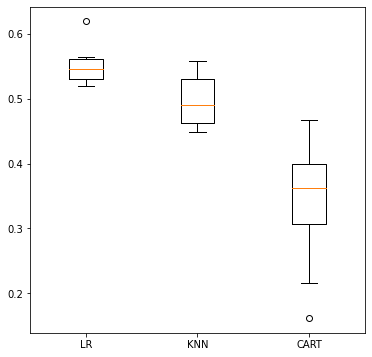

In [45]:
from matplotlib  import pyplot
fig = pyplot.figure(figsize=(6,6))
ax=fig. add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
#boxplot shows the skewness in the data

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [48]:
pipelines = []

pipelines.append(('ScaledLR' , Pipeline([('Scaler' , StandardScaler()) , ('LR' , LinearRegression())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeRegressor())])))

In [49]:
results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits = 10 , random_state = 7, shuffle=True)
  cv_results = cross_val_score(model, X_train, Y_train , cv = kfold)
  results.append(cv_results)
  names.append(name)
  msg = "%s : %f (%f)" % ( name , cv_results.mean() , cv_results.std())
  print(msg)

ScaledLR : 0.550879 (0.027124)
ScaledKNN : 0.603497 (0.035628)
ScaledCART : 0.346975 (0.085739)


[Text(0, 0, 'ScaledLR'), Text(0, 0, 'ScaledKNN'), Text(0, 0, 'ScaledCART')]

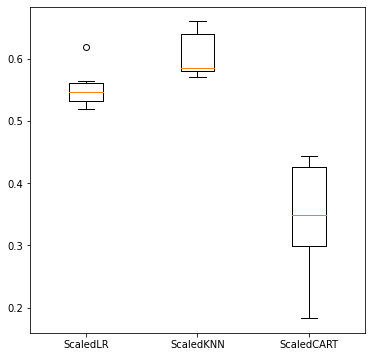

In [50]:
from matplotlib  import pyplot
fig = pyplot.figure(figsize=(6,6))
ax=fig. add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)

In [51]:
scaler = StandardScaler().fit(X_train)
scaledX = scaler.transform(X_train)

In [52]:
import numpy
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors = k_values)

In [53]:
from sklearn.neighbors import KNeighborsRegressor

In [54]:
model = KNeighborsRegressor()

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle = True)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold)

grid_result = grid.fit(scaledX, Y_train)

In [55]:
print("Best %f using %s" % (grid_result.best_score_ , grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']

stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with : %r " % (mean , stdev, param))

Best 0.627988 using {'n_neighbors': 11}
0.374401 (0.080186) with : {'n_neighbors': 1} 
0.563487 (0.039844) with : {'n_neighbors': 3} 
0.602608 (0.036044) with : {'n_neighbors': 5} 
0.613935 (0.031933) with : {'n_neighbors': 7} 
0.620948 (0.028883) with : {'n_neighbors': 9} 
0.627988 (0.027198) with : {'n_neighbors': 11} 
0.627557 (0.025178) with : {'n_neighbors': 13} 
0.627121 (0.029208) with : {'n_neighbors': 15} 
0.625394 (0.027321) with : {'n_neighbors': 17} 
0.624994 (0.026083) with : {'n_neighbors': 19} 
0.624836 (0.024978) with : {'n_neighbors': 21} 


In [56]:

ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()), ('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()), ('RF', RandomForestRegressor())])))

In [57]:
import warnings
warnings.filterwarnings('ignore')

In [58]:
results = []
names = []
for name, model in ensembles: 
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True) 
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: 0.347789 (0.142390)
ScaledRF: 0.664978 (0.036800)


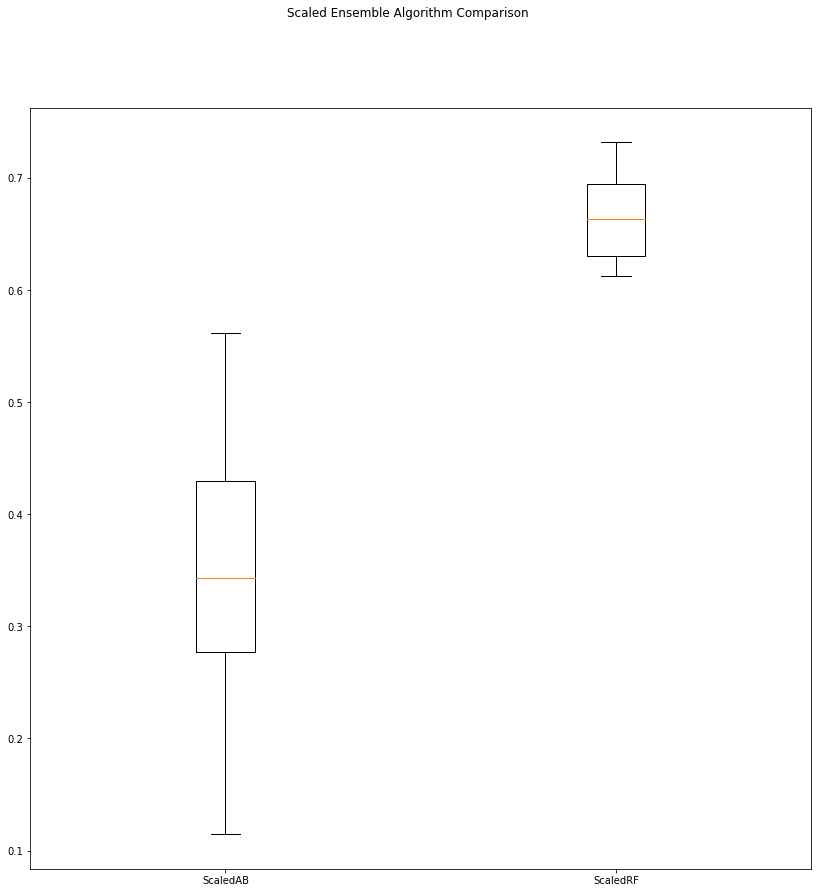

In [59]:
fig = pyplot.figure(figsize=(14,14))
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [60]:
# Parameters for RF
param_grid = dict(n_estimators=numpy.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100]))

In [61]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = RandomForestRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [62]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params): 
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.662382 using {'n_estimators': 100}
0.636684 (0.041734) with: {'n_estimators': 10}
0.651496 (0.041545) with: {'n_estimators': 20}
0.655402 (0.039297) with: {'n_estimators': 30}
0.657681 (0.039062) with: {'n_estimators': 40}
0.658250 (0.039378) with: {'n_estimators': 50}
0.658990 (0.038596) with: {'n_estimators': 60}
0.660852 (0.039432) with: {'n_estimators': 70}
0.661083 (0.039063) with: {'n_estimators': 80}
0.661941 (0.038455) with: {'n_estimators': 90}
0.662382 (0.037892) with: {'n_estimators': 100}


In [63]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = RandomForestRegressor(random_state=seed, n_estimators=40)
model.fit(rescaledX, Y_train)

RandomForestRegressor(n_estimators=40, random_state=7)

In [64]:
rescaledValidationX = scaler.transform(X_validation)
pred_train = model.predict(rescaledX)
predictions = model.predict(rescaledValidationX)

In [65]:
from sklearn.metrics import r2_score

print(r2_score(Y_train,pred_train ))
print(r2_score(Y_validation,predictions ))

0.950663170876442
0.6551434755004234
